In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.9998
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.9998_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.9998.csv", delimiter=" ")



In [2]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [3]:


future_error = []




for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 100
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
   

    
    
    

0 test error: 0.4874021454004427
1 test error: 4.475800542198827
2 test error: 10.88854939170925
3 test error: 11.279085130921661
4 test error: 7.69915007904531
5 test error: 11.893821248086782
6 test error: 3.583655787605489
7 test error: 0.45331293178406434
8 test error: 4.108092926021616
9 test error: 13.155007923736438
10 test error: 0.4944414154432538
11 test error: 16.141449404551587
12 test error: 2.2432498995083305
13 test error: 0.4314337907995515
14 test error: 0.4671189871077518
15 test error: 0.46729297622289695
16 test error: 1.4706378617483031
17 test error: 10.071016470139964
18 test error: 0.46084461176056984
19 test error: 0.4758058740190871
20 test error: 1.925101811890934
21 test error: 0.4864275089115367
22 test error: 0.4335676385997781
23 test error: 5.024666325593458
24 test error: 5.0721697481010155
25 test error: 2.023319600313198
26 test error: 0.47351263886498285
27 test error: 0.48549953813306623
28 test error: 0.4664671161751036
29 test error: 0.43938820811

239 test error: 0.42488979843655444
240 test error: 0.4643091514343869
241 test error: 14.341464462752159
242 test error: 0.47509845915577076
243 test error: 0.4569042952315712
244 test error: 0.45284891798208127
245 test error: 10.236309422862341
246 test error: 15.021654351979173
247 test error: 6.341073528717561
248 test error: 11.840454826432438
249 test error: 10.319366435468474
250 test error: 2.8222885989142954
251 test error: 6.661404775756082
252 test error: 3.1681195313178026
253 test error: 15.85291327274858
254 test error: 0.4353214920051349
255 test error: 0.7412827862731972
256 test error: 10.438868797777499
257 test error: 1.174846957504884
258 test error: 2.275458630292367
259 test error: 3.110415983661465
260 test error: 0.42261038698683473
261 test error: 0.4493192398955854
262 test error: 11.95861049989002
263 test error: 1.3227881430424842
264 test error: 0.407764617871225
265 test error: 0.43502930194721073
266 test error: 13.562690726444146
267 test error: 11.6024

476 test error: 0.3972061188811952
477 test error: 15.170825971682387
478 test error: 4.65090998947005
479 test error: 6.044829808219148
480 test error: 9.780630325469952
481 test error: 0.4508654134950075
482 test error: 14.893685185749776
483 test error: 2.96986357981372
484 test error: 13.787747983885808
485 test error: 4.132077124869995
486 test error: 12.209760512670545
487 test error: 8.5969855284158
488 test error: 9.159204756020712
489 test error: 0.41988969139694254
490 test error: 2.8006656288174168
491 test error: 9.340485906892777
492 test error: 0.40336480400885844
493 test error: 8.007955616281993
494 test error: 0.44673284359515397
495 test error: 6.951461673094565
496 test error: 9.91482784987597
497 test error: 8.845514071435186
498 test error: 0.44540567773256595
499 test error: 16.496456993311455
500 test error: 8.31351658584921
501 test error: 11.494589313600741
502 test error: 3.4031482838823934
503 test error: 16.24195612853078
504 test error: 16.10492952786859
50

713 test error: 1.6815003912114348
714 test error: 13.134391280539967
715 test error: 13.392552169264123
716 test error: 11.763690705805654
717 test error: 13.318278732749631
718 test error: 0.4167184836656031
719 test error: 6.490094593674404
720 test error: 8.327304530081364
721 test error: 13.406953250324507
722 test error: 0.43809147360909245
723 test error: 5.0985629933859675
724 test error: 9.377728359998436
725 test error: 6.87413258111287
726 test error: 3.953066236665455
727 test error: 14.341167680565121
728 test error: 8.530743559922918
729 test error: 4.438173090007286
730 test error: 12.810935239651789
731 test error: 0.4800908476893373
732 test error: 3.5767753529907598
733 test error: 10.611615755101244
734 test error: 0.42852859069521276
735 test error: 1.2267269911442618
736 test error: 11.001949836004908
737 test error: 2.738752872027709
738 test error: 4.280894703790388
739 test error: 0.42514943521656506
740 test error: 13.485046351384904
741 test error: 0.480819966

953 test error: 9.506464289465653
954 test error: 14.03191840090761
955 test error: 8.06358105449723
956 test error: 17.956284845778146
957 test error: 0.48563231574342286
958 test error: 7.322909246279499
959 test error: 9.650552277772812
960 test error: 15.593879276008376
961 test error: 4.697538358502722
962 test error: 0.4179206253053193
963 test error: 5.414098382886763
964 test error: 13.161805918143571
965 test error: 10.82600198533897
966 test error: 11.727218845417228
967 test error: 9.057015276384625
968 test error: 14.331710068038154
969 test error: 3.2376783940441998
970 test error: 1.4125887343823027
971 test error: 9.242430938719592
972 test error: 0.44590603893777114
973 test error: 0.45324786833131486
974 test error: 10.85215692635363
975 test error: 16.611301501188887
976 test error: 10.14316404091231
977 test error: 13.17857316268895
978 test error: 11.882660974590857
979 test error: 10.816232468722152
980 test error: 0.4452985973725476
981 test error: 8.6654386540891

1187 test error: 5.1377032067291175
1188 test error: 1.7595677710435649
1189 test error: 12.841233539763774
1190 test error: 5.15213783699555
1191 test error: 0.44221592851733454
1192 test error: 0.3996444881089897
1193 test error: 10.26324269263995
1194 test error: 0.46634155426014684
1195 test error: 0.48898684695659156
1196 test error: 0.4395963701266154
1197 test error: 0.43687395770769727
1198 test error: 14.24863509638798
1199 test error: 0.4475760725640109
1200 test error: 9.546710831872039
1201 test error: 12.327782902967884
1202 test error: 0.4939330224580133
1203 test error: 11.389849180380196
1204 test error: 12.160511742820669
1205 test error: 8.886940312388536
1206 test error: 4.887336836053845
1207 test error: 15.800578173230774
1208 test error: 0.43693703242102655
1209 test error: 0.4243612249451402
1210 test error: 3.8001561211667623
1211 test error: 0.4173226950441926
1212 test error: 1.2150542923355807
1213 test error: 9.292969366992226
1214 test error: 0.495244796688

1417 test error: 15.035480330710683
1418 test error: 11.328304052204853
1419 test error: 2.6862937800348208
1420 test error: 10.265821809587816
1421 test error: 0.46269965690862375
1422 test error: 10.60964220229738
1423 test error: 6.409497296641092
1424 test error: 0.42540295032900466
1425 test error: 0.42346095214797724
1426 test error: 10.466281492211346
1427 test error: 14.69265318160408
1428 test error: 1.1566283085608904
1429 test error: 1.8852555381029577
1430 test error: 9.769310543768931
1431 test error: 11.276603313656826
1432 test error: 0.4907403959982134
1433 test error: 0.4660673428046238
1434 test error: 10.692621427174805
1435 test error: 6.826254171361832
1436 test error: 0.4525677748299072
1437 test error: 0.4069622011526359
1438 test error: 1.856543495450815
1439 test error: 0.41152452989449356
1440 test error: 13.139908974539
1441 test error: 14.05349016113535
1442 test error: 0.49074150919411114
1443 test error: 5.812300785038043
1444 test error: 11.19546089055707

1649 test error: 5.026231664898914
1650 test error: 12.09922061575327
1651 test error: 2.1538846787825743
1652 test error: 15.362294506188917
1653 test error: 0.49733235644344526
1654 test error: 7.492958211288831
1655 test error: 0.5103367948965601
1656 test error: 0.515823743459112
1657 test error: 6.8253434966790225
1658 test error: 13.657242780036308
1659 test error: 11.750833011144262
1660 test error: 0.4607497195774149
1661 test error: 11.908372175474078
1662 test error: 11.190164655326202
1663 test error: 13.722878467612118
1664 test error: 0.46076989697704734
1665 test error: 12.219006115961585
1666 test error: 0.4381590640574183
1667 test error: 14.201402722670982
1668 test error: 0.4315968638164734
1669 test error: 6.473127323498541
1670 test error: 11.32035263321264
1671 test error: 0.4476286616161385
1672 test error: 0.450429627562533
1673 test error: 0.43658637768506897
1674 test error: 13.452407809806743
1675 test error: 13.215634126433404
1676 test error: 0.4308959769695

1880 test error: 3.4235801026054045
1881 test error: 13.107643311689236
1882 test error: 13.167535624644275
1883 test error: 0.4358318685951411
1884 test error: 12.427998124267509
1885 test error: 9.789579683666247
1886 test error: 8.599582621873692
1887 test error: 0.4225216802436068
1888 test error: 13.491285790587277
1889 test error: 0.39871978298004906
1890 test error: 0.4059477219815841
1891 test error: 2.4053412228073667
1892 test error: 5.904625263019664
1893 test error: 16.74635014994672
1894 test error: 9.30295150579989
1895 test error: 15.605837813631554
1896 test error: 1.7657804436913709
1897 test error: 0.4627978428892919
1898 test error: 1.1419554515951666
1899 test error: 0.37739384461893316
1900 test error: 11.555047564942821
1901 test error: 0.4852965935351831
1902 test error: 0.4285518340284784
1903 test error: 0.479626276171294
1904 test error: 15.759711491312638
1905 test error: 3.8181738515929067
1906 test error: 10.427234015652495
1907 test error: 7.52818487882688

2112 test error: 0.43843208696632524
2113 test error: 0.4721980211266575
2114 test error: 1.4206957123773392
2115 test error: 12.78215979926987
2116 test error: 0.44031900859621886
2117 test error: 12.896333999034049
2118 test error: 15.25080859642041
2119 test error: 4.7730803110761775
2120 test error: 0.48571792690367543
2121 test error: 4.016511917087169
2122 test error: 7.525939965600115
2123 test error: 0.7105585570688335
2124 test error: 2.6625361980059927
2125 test error: 0.45533226857894843
2126 test error: 0.41847311751887445
2127 test error: 5.730345332152285
2128 test error: 19.938397152826774
2129 test error: 11.206770168632573
2130 test error: 7.111939782508255
2131 test error: 11.375880091663303
2132 test error: 2.0320240991549254
2133 test error: 0.5091182443517918
2134 test error: 0.482061262496758
2135 test error: 12.690330232054725
2136 test error: 13.089336324392825
2137 test error: 11.829161922967558
2138 test error: 7.32481588855707
2139 test error: 3.0174750335628

2342 test error: 0.44316638965764665
2343 test error: 15.219824205586608
2344 test error: 13.153196294830707
2345 test error: 12.254759154483715
2346 test error: 18.54027333848296
2347 test error: 10.5120874347587
2348 test error: 26.586891283512415
2349 test error: 13.45129919571144
2350 test error: 8.319209933118811
2351 test error: 8.296817507780263
2352 test error: 11.479382863742382
2353 test error: 3.2473517626595165
2354 test error: 9.053159917394014
2355 test error: 15.379367056344844
2356 test error: 5.267376998456898
2357 test error: 12.191954502229509
2358 test error: 1.5462294343744478
2359 test error: 6.76474189299707
2360 test error: 2.960977650183729
2361 test error: 12.660496264969959
2362 test error: 11.502229695762344
2363 test error: 12.288411076872581
2364 test error: 11.603586819834101
2365 test error: 0.4854527186568039
2366 test error: 9.28314940777223
2367 test error: 0.4969010729781302
2368 test error: 11.621971722050134
2369 test error: 11.321263771486034
2370

2574 test error: 0.4606359319734507
2575 test error: 9.81548418216636
2576 test error: 10.27382899323948
2577 test error: 7.456126220125444
2578 test error: 6.197950328587124
2579 test error: 11.97734823662315
2580 test error: 11.658634380167424
2581 test error: 7.8595375097093045
2582 test error: 2.70283636865513
2583 test error: 8.070465584798427
2584 test error: 2.4658964981160474
2585 test error: 15.78974412658489
2586 test error: 4.0384609485683916
2587 test error: 0.4822694736191372
2588 test error: 10.882364998362501
2589 test error: 0.4388552762052758
2590 test error: 14.494781401564563
2591 test error: 14.272102279126532
2592 test error: 9.501983534103953
2593 test error: 0.44278697835948655
2594 test error: 7.183269959031906
2595 test error: 15.095484371174786
2596 test error: 16.420718838171226
2597 test error: 12.871842120937943
2598 test error: 11.340717131261982
2599 test error: 13.616908086971975
2600 test error: 0.43920449309685095
2601 test error: 11.359498404268951
26

2804 test error: 3.6421486986419183
2805 test error: 0.4484970263724185
2806 test error: 0.4928531679599847
2807 test error: 10.557825771852649
2808 test error: 0.7805495972154292
2809 test error: 0.3983862922879723
2810 test error: 14.520950406278875
2811 test error: 8.984909326765933
2812 test error: 0.45966671085464883
2813 test error: 8.003425929577302
2814 test error: 17.150332224353058
2815 test error: 10.956513660566316
2816 test error: 10.095263929643153
2817 test error: 15.092395736155396
2818 test error: 4.2348357344150305
2819 test error: 7.305436784990622
2820 test error: 9.97136158041591
2821 test error: 9.688464388054923
2822 test error: 7.2258194078910245
2823 test error: 0.45357666294818855
2824 test error: 2.4870236734082605
2825 test error: 0.4124226945169596
2826 test error: 12.951404622659386
2827 test error: 12.300803306680477
2828 test error: 1.0515553904953736
2829 test error: 14.176341282708606
2830 test error: 0.43602513361651235
2831 test error: 14.48851307283

3036 test error: 0.434662389034218
3037 test error: 0.45924557226876583
3038 test error: 12.62496583448418
3039 test error: 0.6762673378549131
3040 test error: 0.4496544251080649
3041 test error: 1.1185181229250554
3042 test error: 10.25739882447946
3043 test error: 0.4944933932439102
3044 test error: 9.70697631662069
3045 test error: 28.821197402386698
3046 test error: 0.5135518122192337
3047 test error: 9.964213064304115
3048 test error: 14.034779958396772
3049 test error: 0.4813287267062374
3050 test error: 3.831735404386267
3051 test error: 0.9152103189744483
3052 test error: 2.6387375483997264
3053 test error: 0.4397026573836009
3054 test error: 0.4454125981038022
3055 test error: 12.4658205719635
3056 test error: 11.022934508072941
3057 test error: 8.816013218176984
3058 test error: 9.937988872736314
3059 test error: 2.708853803244982
3060 test error: 0.4499249447558557
3061 test error: 12.878020922917226
3062 test error: 0.41521300389094007
3063 test error: 5.792511218040879
306

3271 test error: 0.4574623981309181
3272 test error: 1.2366155692982734
3273 test error: 10.181547346750135
3274 test error: 8.301974084237882
3275 test error: 4.473564821722127
3276 test error: 6.229659526972213
3277 test error: 16.365265173888798
3278 test error: 12.5439490112631
3279 test error: 12.875692780994967
3280 test error: 13.505572195615974
3281 test error: 12.423127801207885
3282 test error: 14.668869239445447
3283 test error: 9.96493137296993
3284 test error: 17.031826910037708
3285 test error: 0.41925433342960333
3286 test error: 0.4210777191200119
3287 test error: 6.777190037304196
3288 test error: 1.52515276640638
3289 test error: 11.029394222535224
3290 test error: 0.476140365320584
3291 test error: 11.54198563484247
3292 test error: 15.77908914101888
3293 test error: 11.078663811222802
3294 test error: 0.476222901661158
3295 test error: 0.4468109929495232
3296 test error: 10.501797706173942
3297 test error: 0.45210007790644346
3298 test error: 11.858647702803218
3299

In [4]:
FUTUREerror = turnintoarray(future_error,future)
mae,mse,rmse = geterrors(FUTUREerror)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')


mae [0.0011622652895001545, 0.0015951096632056889, 0.0015811318944350852, 0.0017635999595429469, 0.0016284979746258696, 0.001982709383363163, 0.0024958427488577383, 0.0027259707195557885, 0.004438606294936685, 0.008702987967403653, 0.01947525950204346, 0.040662029488217684, 0.08298338563754352, 0.16460253430618113, 0.3296310408522826, 0.5234387117533841, 0.7164850631814079, 0.8962679305684179, 1.1244309456542183, 1.2428020118683993, 1.5408566246325657, 1.6029849024934364, 1.911346343964563, 2.0213741788568305, 2.3067642940585804, 2.3730480558459774, 2.716359676834507, 2.743168862228248, 3.0447449454362796, 3.0558954052514484, 3.3855371791038924, 3.292401995009025, 3.6409890913220506, 3.5483046150638677, 3.899418188858767, 3.8477595106010916, 4.12846683913582, 4.007032470016101, 4.364816095745163, 4.257309507320003, 4.548165025730212, 4.500603611995356, 4.732271900641115, 4.704273917641445, 4.953163513102897, 4.884678458896215, 5.119049200974056, 5.097191994540953, 5.314816548495068, 5.

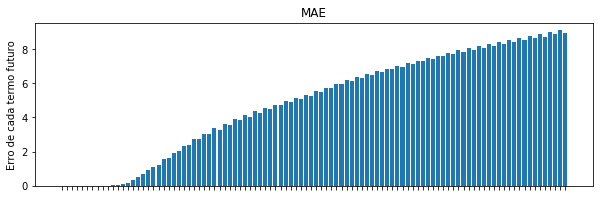

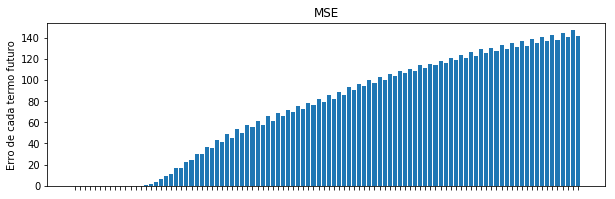

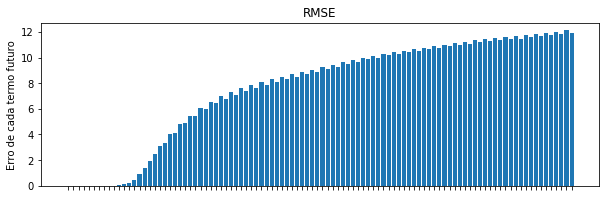

In [5]:

label = []

plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

    